<p style='text-align: center'><a href=https://www.biozentrum.uni-wuerzburg.de/cctb/research/supramolecular-and-cellular-simulations/>Supramolecular and Cellular Simulations</a> (Prof. Fischer)<br>Center for Computational and Theoretical Biology - CCTB<br>Faculty of Biology, University of Würzburg</p>

<p style='text-align: center'><br><br>We are looking forward to your comments and suggestions. Please send them to: <br><br></p>
    
 <p style='text-align: center'>   <a href=andreas.kuhn@uni.wuerzburg.de>andreas.kuhn@uni.wuerzburg.de</a> or <a href=sabine.fischer@uni.wuerzburg.de>sabine.fischer@uni.wuerzburg.de</a></p>

<h1><p style='text-align: center'> Introduction to Julia </p></h1>


## Plots

We will now take an extensive look at the `Makie` package for visualization in Julia. `Makie` is a very powerful data visualization library written in and for Julia. So far `Makie` supports 4 different backends each serve a different purpose. 

`CairoMakie` is the one we will be using here primarily. It excels in producing inline static 2D plots suited for scientific tasks. 

`GlMakie` is the next most important backend. In GlMakie the plots are created in a separte window, which makes it less convinent to use for static plots. But it comes with the advantage that, it is GPU  based (Graphic Processor Unit = your Graphics card) which makes plotting very fast and is therefore well suited for video creation or interactive animations. 

`WGLMakie` is very similar to `GlMakie` with the difference that it is running in the browser therefore sacrificing some speed towards better portabilty and compatibilty. 

`RPRMakie` is an experimental backend to use raytracing on your GPU. It is quite early in development but can already create beautfiul images: 


<div>
<img src="raytracing.png" width="600"/>
</div>

Tipp: For more beautiful images and examples created with `Makie` visit the page : https://lazarusa.github.io/BeautifulMakie/




In order to make plots with Makie, we have to install and the import the backend we want to use in this case `CairoMakie`. 
All commands that we will learn here, will also work in `GlMakie` and `WGLMakie` but will produce different output streams and formats. `RPRMakie`  is a little bit more complicated, so for now just be aware of its existence ;). 

In [1]:
using CairoMakie

## 1. Line Plot - Quick and Dirty

To make a normal line plot the function `lines()` is used. It needs at least one input argument for y-axis values which has to be an `Int64` or `Float64` array or an iteratable. It also takes an argument for x-axis values in the same form and shape of the y-axis argument. The first input argument always appears on the x-axis, whereas the second always appears on the y-axis. If no x-axis argument is given the y values will be plotted against x values starting from `0` and going up `1` for every y value. If a x-axis argument is given it is important that the two arguments always have the same dimension. 
We can name assign our plot to a variable. 
To invoke the plot we have to use the `display(variable)` function. If the figure is the last line in a notebook cell it would also work without `display`, but at least in a julia script you will need it in order to get instant output.

Note: The first time to plot sth. in Julia can take significantly more time than the following plots. This is due to the JIT-Complier (Just in Time) of Julia and it is a well known problem (https://www.google.com/search?client=firefox-b-e&q=julia+first+time+to+plot). If this becomes more than an inconvenience, there exist some tedious workarounds to that problem. But the devs have promised to improve the performance in future updates, so for now don't be surprised and enjoy the little break before your first plot of the day. 

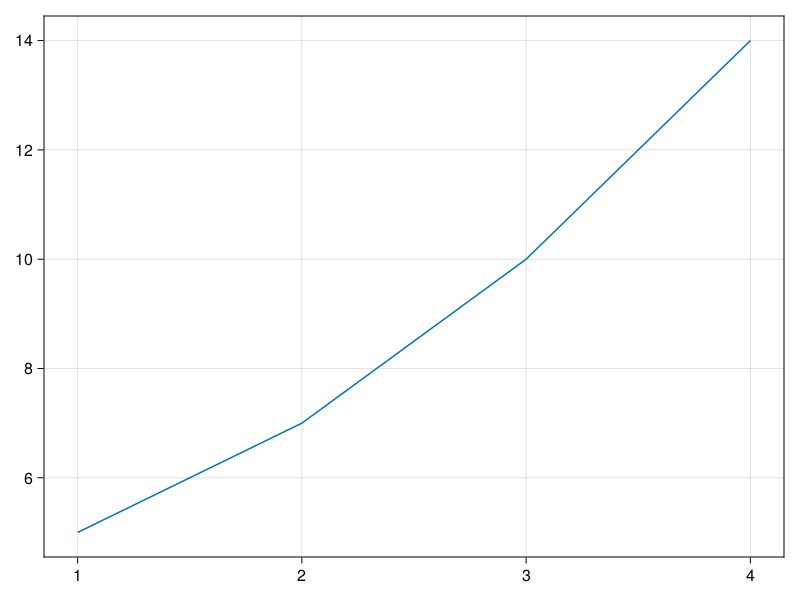

In [2]:
input = [5,7,10,14]
f = lines(input) 
display(f)

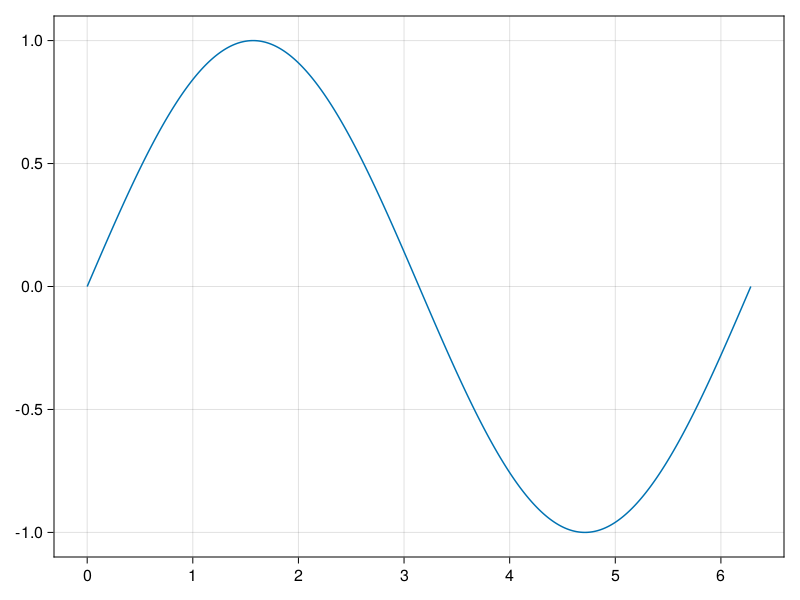

In [3]:
x = range(start = 0,stop = 2π, length = 1000)
# hint: to write π in Julia type \pi and press tab
y = sin.(x)
f2 = lines(x,y)
save("f2.png", f2)
save("f2.pdf", f2)
save("f2.svg", f2)
f2

We can save our figure with the `save()` function. This function takes the name of the to be created file as the first argument and the name of the figure as the second argument. With the ending of the file name `.png, .svg, .pdf` we can control what file to create.

Now a basic first plot is done. But basically a plot without title and labeled axes is more or less useless. To give the plot a title and labels we have to dig a little deeper into how Makie works.
So far we have use the `line()` function. This function does a lot of stuff for you automatically (creating a figure-, axis- and a plot- object). This is very convenient when we just want to plot something quick and dirty. But if we want to understand how `Makie` works internally, so that we can use it to its full potential, it is better to do some of the stuff manually by ourselfs . 

## 2. How to properly create Figures

At first, we have to create a figure with the `Figure()` function. A figure is the top object in Makie, it serves as the input argument to the top level functions `display` and `save` that we have shown before. It has one important keyword argument `resolution` which can be set to a given tuple. 

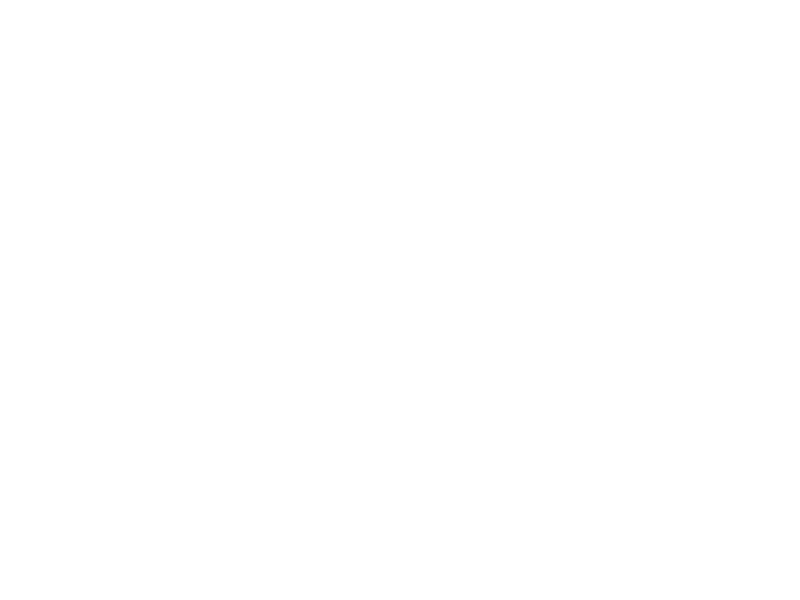

In [5]:
f3 = Figure()

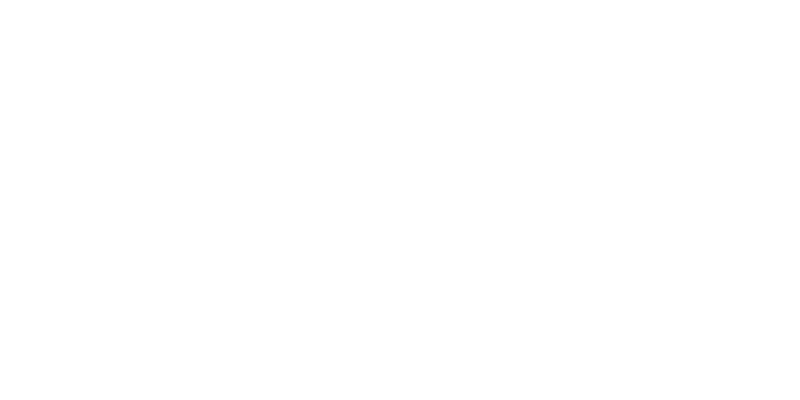

In [6]:
# create figure f4 with a fixed resolution
f4 = Figure(resolution = (800,400))

## 3. Adding axes to a Figure

As we can see in the cells above, the created figures do not contain anything. Therefore we have to create axes in the figures with the `Axis()` function.

##### Note: One figure can have multiple axes but every axes is only part of one figure. 

The `Axis()` function takes as input arguments the figure in which it should be created and its relative position in it. If we only want one axis in a figure we just put it in the first `figurename[1,1]` position.  If we want mutiple axis in one figure we just add more in the `[y,x]-direction`. Makie will scale the axes automatically to their content and makes them per default equally big.

Hint: There are a lot of possible options, how to modify axes in Makie ( scale, link, change x & y, limits,... )  https://makie.juliaplots.org/v0.15.2/examples/layoutables/axis/

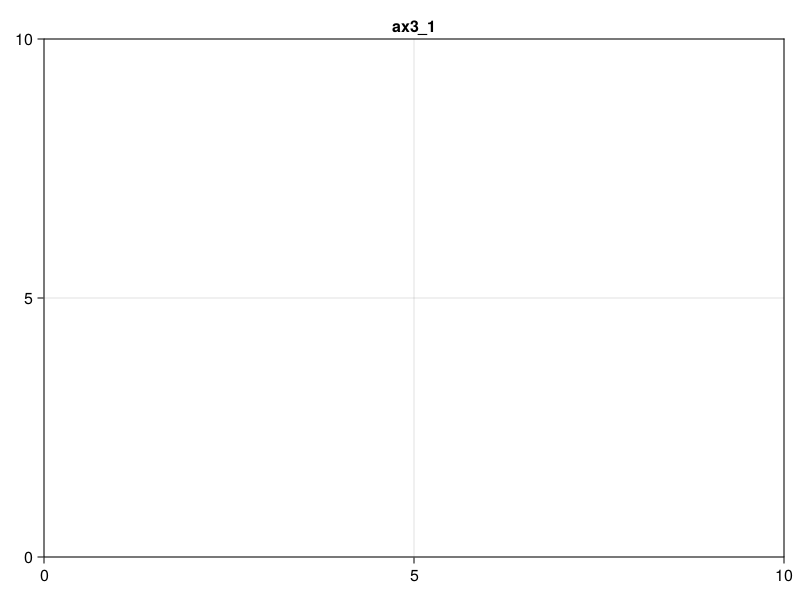

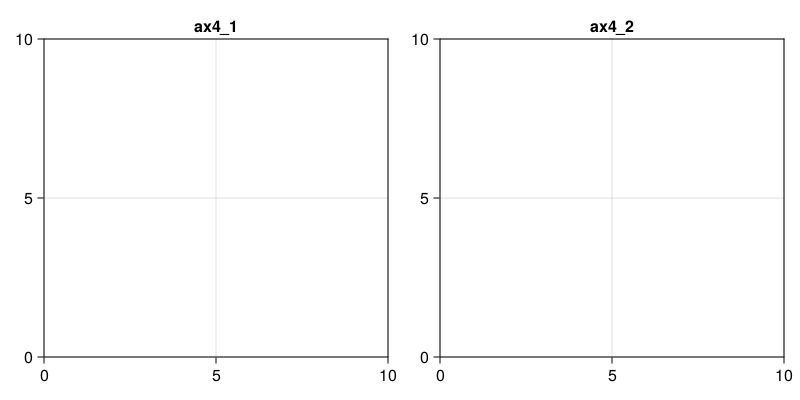

In [7]:
ax3_1 = Axis(f3[1,1],title = "ax3_1")
display(f3)
ax4_1 = Axis(f4[1,1],title = "ax4_1")
#add another axis to figure f4
ax4_2 = Axis(f4[1,2],title = "ax4_2")
display(f4)

Now we have created one axis in f3 and two axes in f4. All these axes have been asigned to a name to acces them easier in the future. There are many keyword arguments for that can be either given to an axis when it is created or later by using the `axis.keyword_argument = ` syntax. E.g. :   `xlabel, ylabel, title, xlabelsize, ylabelsize, titlesize , backgroundcolor`. More can be found here: https://docs.juliahub.com/AbstractPlotting/6fydZ/0.12.12/makielayout/reference.html  



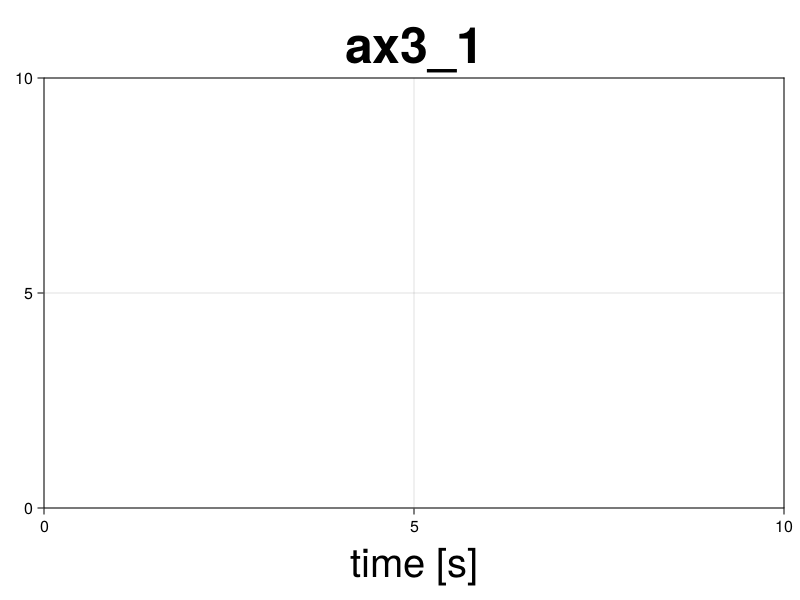

In [9]:
ax3_1.xlabel = "time [s]" 
ax3_1.xlabelsize = 40
ax3_1.titlesize = 50
f3

Only execute these cells once, otherwise `Makie` will create new axes under the same name but it does not automatically delete the old ones, which still exist but don't have a name asigned to them anymore (very bad! ).  
If we want to create a new axis at the same spot as a previously created axis we need to delete the old axis with `delete!(axis)`

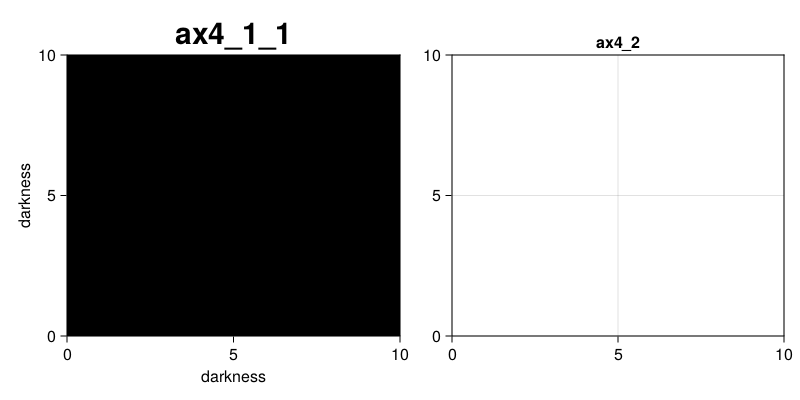

In [10]:
delete!(ax4_1)
ax4_1_1 = Axis(f4[1,1],title = "ax4_1_1", titlesize = 30, backgroundcolor = "black",ylabel = "darkness",xlabel ="darkness")
f4

## 3. Ploting into an axis 

Now we can finally start to plot into our created axes. Therefore we use one of the many plotting functions that makie provide (https://makie.juliaplots.org/v0.15.2/examples/plotting_functions/). The most important ones are `lines!(), scatter!(), hist!(), heatmap!() ` . These function create a plot into a given axis, if the axis is omitted then the last used axis is the default value.  If you want to modify the plots in the future it makes sense to also give them a name (but you don't need to). 

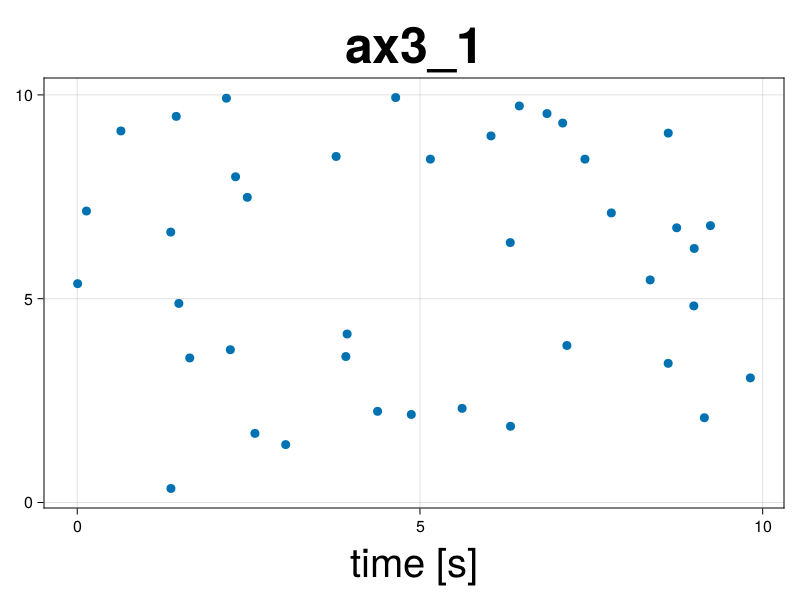

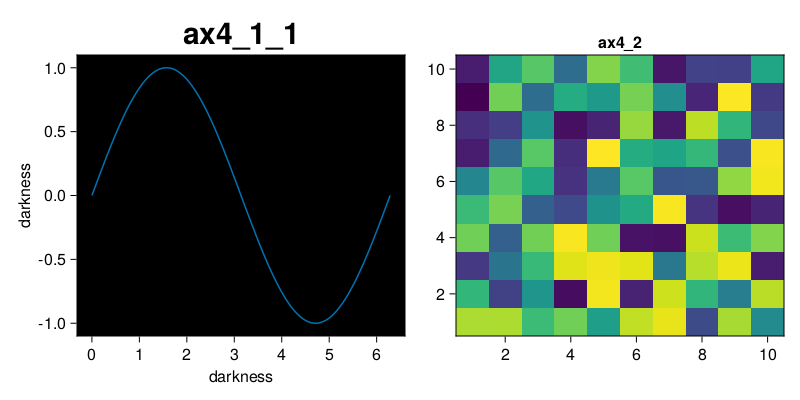

In [11]:
scatty =  scatter!(ax3_1, 10*rand(40),10*rand(40))
liney = lines!(ax4_1_1,x,y,label = "sinus")
heaty = heatmap!(ax4_2, rand(10,10),label = "random")
display(f3)
display(f4)


Similar to the axes: Only execute these cells once, otherwise `Makie` will create new plots under the same name but it does not automatically delete the old ones, which still exist but don't have a name asigned to them anymore (very bad! ).  
If we want to create a plot and replace the old one need to delete the old plot first with `delete!(axis_name, plot_name)`

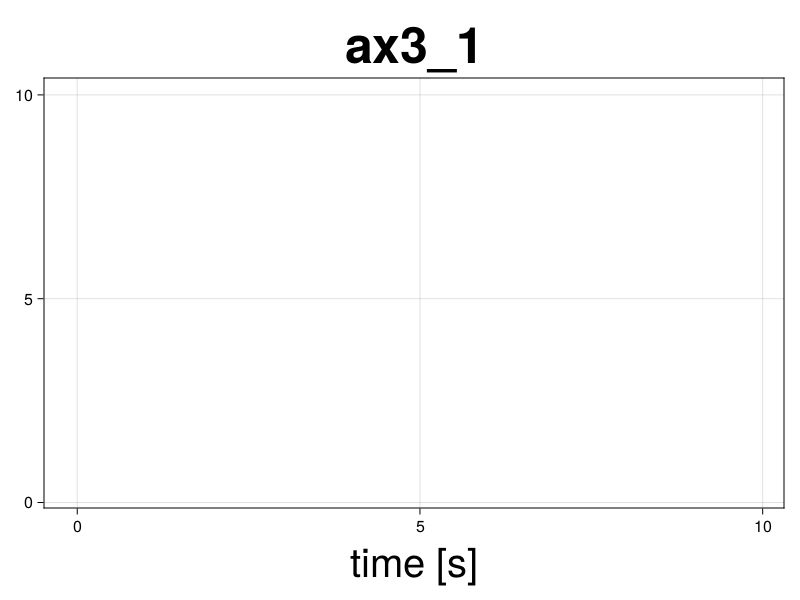

In [12]:
delete!(ax3_1,scatty)
f3

Similar to the `Axis()` function, the different plot functions `(lines!(), scatter!(),...)` also have a lot of keywordsarguments like `label, linewith, marker, markersize, color ... `. These can be found here https://makie.juliaplots.org/dev/examples/plotting_functions/ . Also similar to the `Axis` object, we can either give these keyword arguments during creation or later with the `plot_name.keywordargument = ` syntax

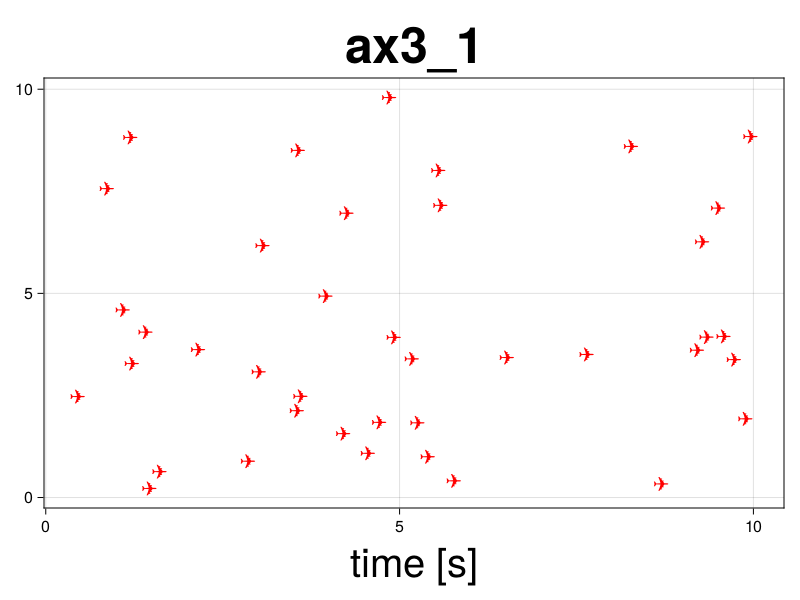

In [13]:
#adding keyword arguments during creation
scatty2 =  scatter!(ax3_1, 10*rand(40),10*rand(40),marker = '✈', color = :red,markersize = 20, label = "airplanes")
#f3
f3

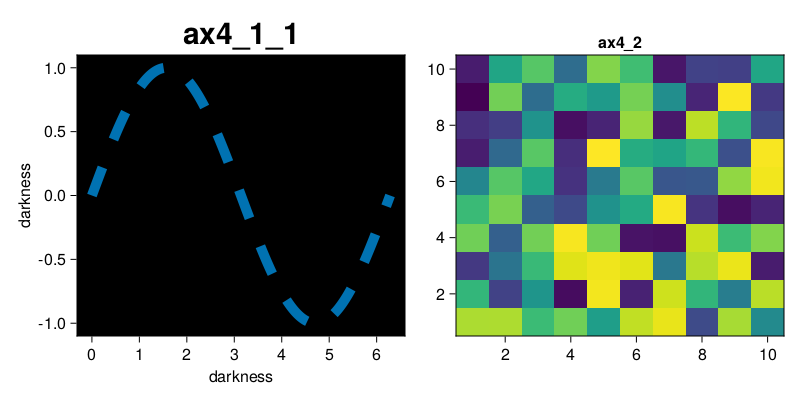

In [14]:
# adding keyword arguments after creation 
liney.linewidth = 10
liney.linestyle = :dash
display(f4) 

#### 4. Making a legend 

There are two different ways to create a legend. The first one is to create a legend as an axis object with the `Legend()` function. Where we have to specify where we want it on the figure and as a second argument to which axis it is refering. In this case the legend appears outside of the axis. The thrid optional argument is a string which will be used as the title of the legend.  If we want to create a legend inside an axis we can use the `axislegend` function. In this case we only have to supply the axis where we want it to be drawn.  

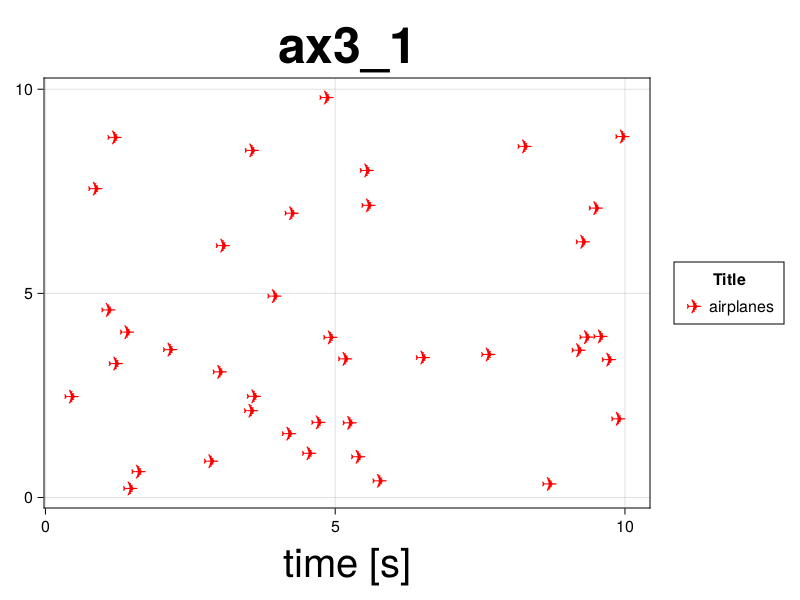

In [15]:
leggy = Legend(f3[1,2],ax3_1,"Title")
f3

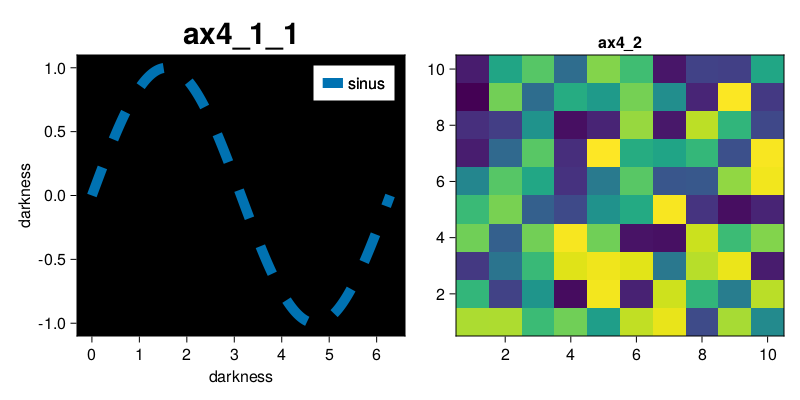

In [17]:
axislegend(ax4_1_1)
f4

All the legends have so far use the `labels` of the plots that we have given them as a keyword argument during creation. We can also have many other options like to manually write text into a legend or only use ever second plot,... Everthing regarding legends can be found here https://makie.juliaplots.org/stable/examples/layoutables/legend/

We can also change the color of plots with the `color` keyword argument.
Hint: All available colors can be found here http://juliagraphics.github.io/Colors.jl/stable/namedcolors/

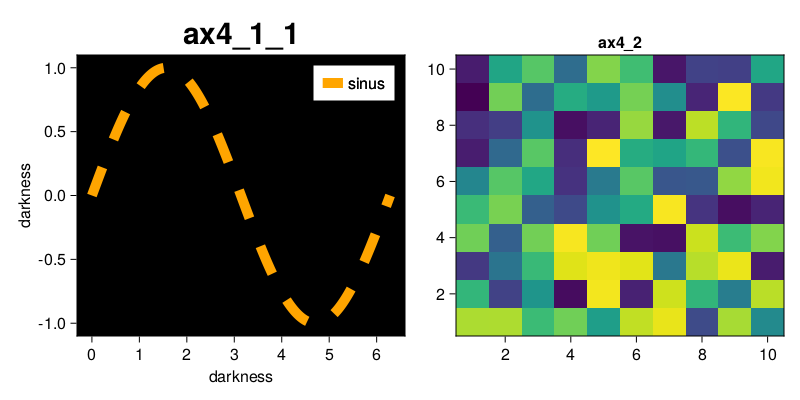

In [18]:
liney.color = "orange1"
f4

### 5. Everything comes together 

Now we will create a plot manually step by step in one cell with proper naming of all its contents. This is the way you should create your plots from now on:  

#### 5.1 Line Plot

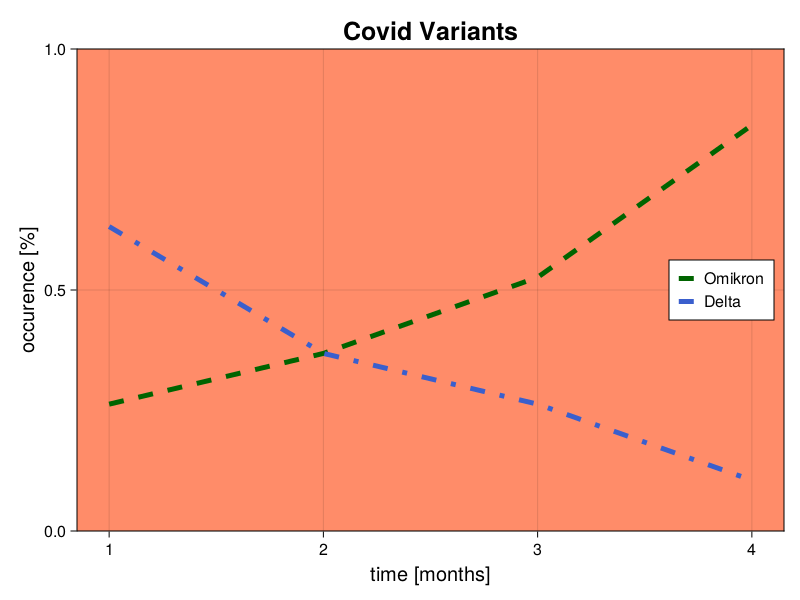

In [19]:
x1,y1 = [1,2,3,4],[5,7,10,16]./19
x2,y2 = [1,2,3,4],[12,7,5,2]./19

f5 = Figure()
ax5_1 = Axis(f5[1,1],title = "Covid Variants", titlesize = 25, backgroundcolor = "salmon1",
    ylabel = "occurence [%]",xlabel ="time [months]",
    xlabelsize = 20, ylabelsize = 20) 
line5_1_1 = lines!(ax5_1, x1 ,y1, label = "Omikron", linestyle  = :dash, color = "darkgreen",linewidth = 5)
line5_1_2 = lines!(ax5_1, x2, y2, label = "Delta", linestyle  = :dashdot, color = "royalblue3",linewidth = 5)
axislegend(ax5_1,position = :rc)  # positon is keyworded by two things r or l (right or left) and t,c,b (top, center, bottom) 
#setting ylimit after creating plot 
ylims!(ax5_1,0,1.0)
f5

#### 5.2 Bar Plot
Bar plots are one of the most common types of graphs allowing to show data associated with the categorical variables. In Makie `barplot!()` is the function for this purpose. This function takes the arguments: `(axis, x, y)`. We can again use keyword arguments like in `lines!()`, for example `color, strokecolor , strokewidth `)( https://makie.juliaplots.org/v0.15.2/examples/plotting_functions/barplot/#example_5632442707325795766). To customize the x-axis to for e.g. categories instead of coordinates we can use the keyword argument `xticks(x, categories)` which maps coordinates to an equally long sequences of Categories. 

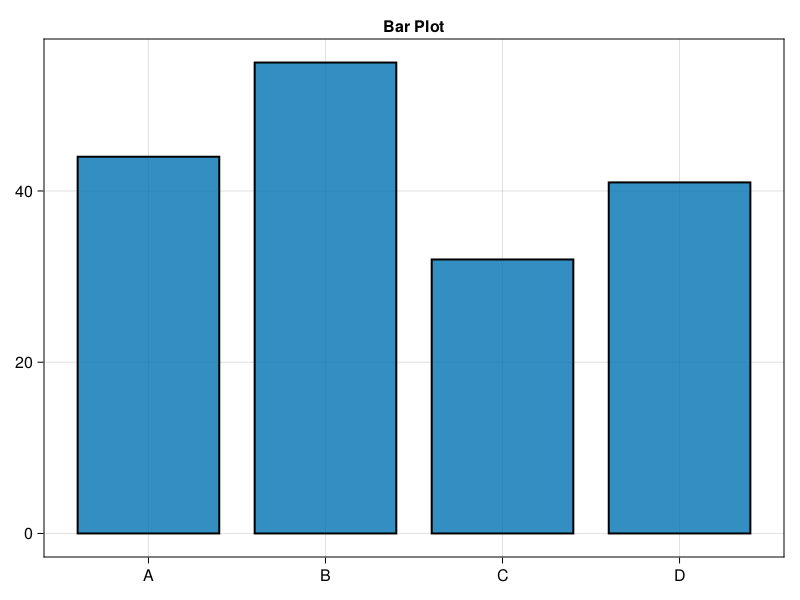

In [20]:
category=["A", "B", "C", "D"]
x_range = 1:length(category)
values=[44,55,32,41]

f6 = Figure()
ax6_1 = Axis(f6[1, 1], xticks = (x_range, category), title = "Bar Plot")
bari6_1 = barplot!(ax6_1, x_range,values, strokecolor = :black, strokewidth = 2)

f6

#### 5.3 Colors
Makie automatically asigns a new color to a plot if we create a new one. In many cases this can be sufficient to colororise a plot.  Like here where we create 4 different barplots in one axis 


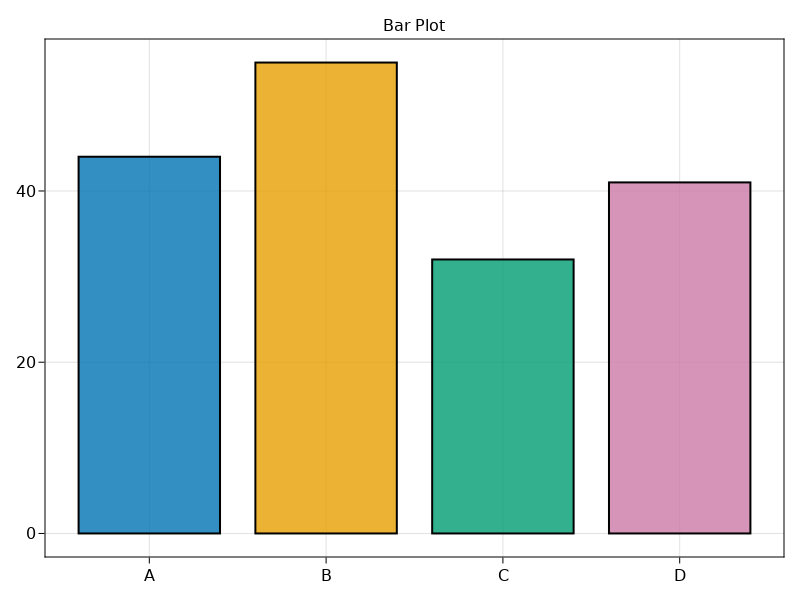

In [18]:
category=["A", "B", "C", "D"]
x_range = 1:length(category)
values=[44.0,55,32,41]

f7 = Figure()
ax7_1 = Axis(f7[1, 1], xticks = (x_range, category), title = "Bar Plot")
for i in x_range
    barplot!(ax7_1, [i],[values[i]], strokecolor = :black, strokewidth = 2) 
    # Hint:  you have to write [i] and [values[i]] instead of i and values[i] as makie can only work with arrays or iterabales as input not with numbers
end
f7

But we can also change the color of each bar/scatter/vector/linesegment in one plot seperately. In this case we have to provide a vector of colors to the keyword argument `color` with the same length as our datapoints.  

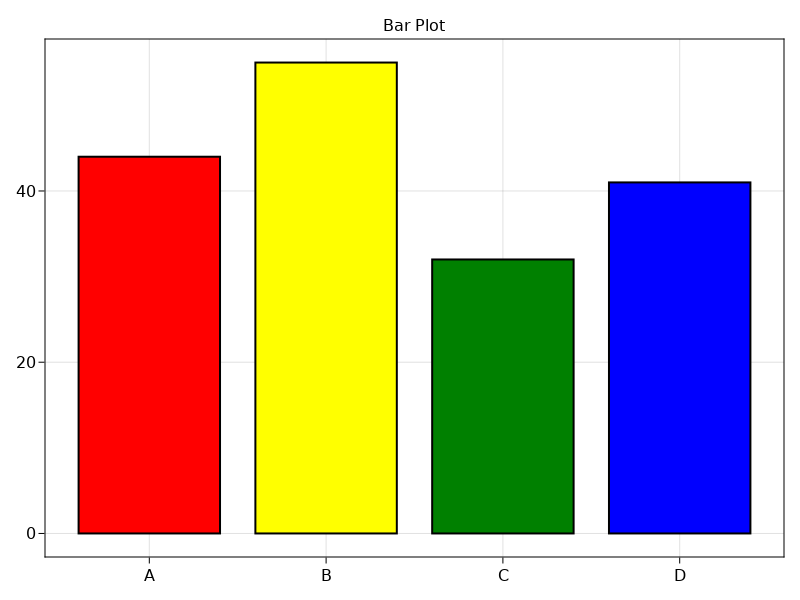

In [19]:
category=["A", "B", "C", "D"]
x_range = 1:length(category)
values=[44,55,32,41]
color_vec = ["red","yellow","green","blue"]

f8 = Figure()
ax8_1 = Axis(f8[1, 1], xticks = (x_range, category), title = "Bar Plot")
bari8_1 = barplot!(ax8_1, x_range,values, strokecolor = :black, strokewidth = 2,color = color_vec)

f8

But  this can become quite anoying for many datapoints therefore, we can also use predefined vectors of colors from the package `ColorSchemes`. 

In [21]:
import ColorSchemes as co

Now we can access the vast kataloge of possible colorvector : https://juliagraphics.github.io/ColorSchemes.jl/stable/catalogue/ 

Just some examples below: 

In [22]:
co.glasbey_hv_n256

In [23]:
co.ocean

In [24]:
co.prism

Now we can a slice of any of these colorvectors to the `color` keyword argument. 

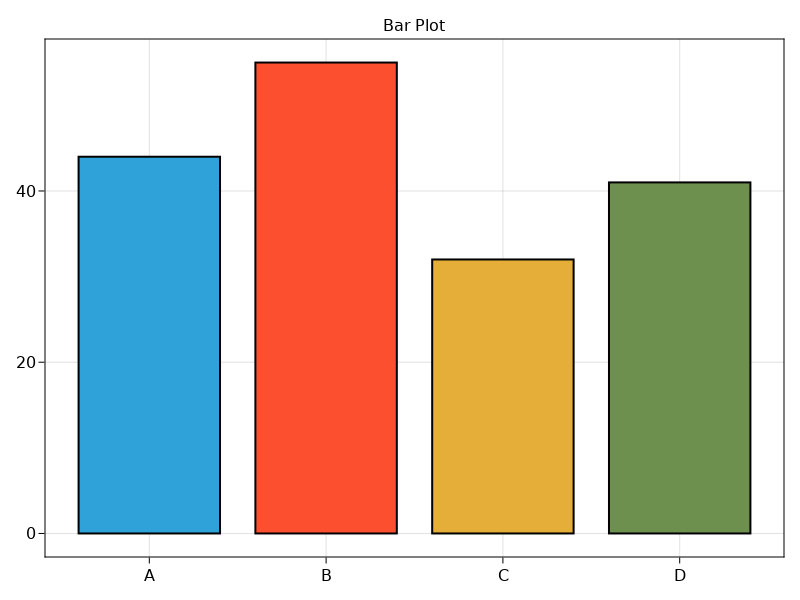

In [25]:
category=["A", "B", "C", "D"]
x_range = 1:length(category)
values=[44,55,32,41]

#slicing the color vector to the range we need in our plot: 

#color_vec = co.prism[x_range]
color_vec = co.glasbey_hv_n256[x_range]

f9 = Figure()
ax9_1 = Axis(f9[1, 1], xticks = (x_range, category), title = "Bar Plot")
bari9_1 = barplot!(ax9_1, x_range,values, strokecolor = :black, strokewidth = 2,color = color_vec)

f9

##### Note: Everything what we have learned here, regarding colors is true for every type of plot in Makie not only barplots

#### 5.4 Errorbars
Makie has its own `errorbars!()` ploting function, which can be used on top of `every type of plot !`. Its arguments are `x, y, and error`. It also has some keywordarguments like `whiskerwidth` which is for the horizontal line on top and `direction` which is per default `:y` but can also be changed to `:x` to plot errors in the x-direction.  https://makie.juliaplots.org/v0.15.2/examples/plotting_functions/errorbars/#example_14474209787928391393

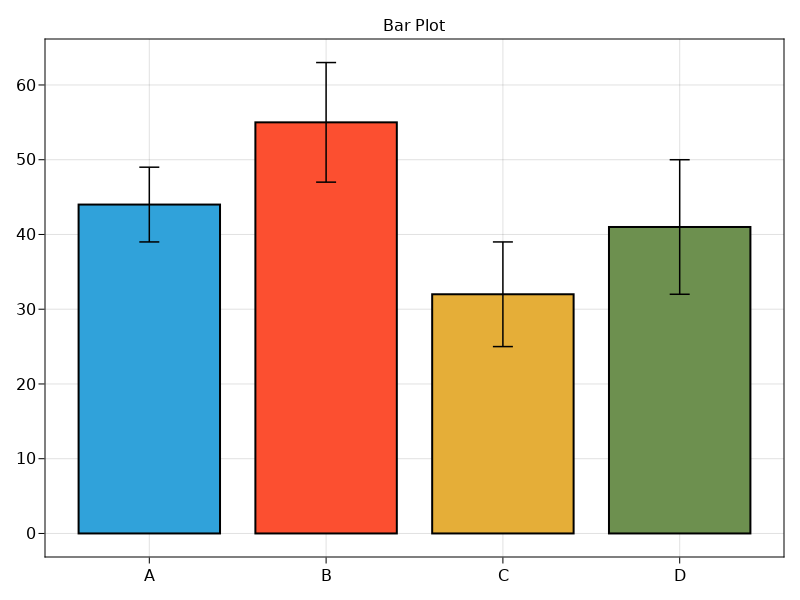

In [26]:
category=["A", "B", "C", "D"]
x_range = 1:length(category)
values=[44,55,32,41]

#color_vec = co.prism[x_range]
color_vec = co.glasbey_hv_n256[x_range]

f10 = Figure()
ax10_1 = Axis(f10[1, 1], xticks = (x_range, category), title = "Bar Plot")
bari10_1 = barplot!(ax10_1, x_range,values, strokecolor = :black, strokewidth = 2,color = color_vec)

# adding error and erro bar plot
error=[5,8,7,9]

erri6_1 = errorbars!(ax10_1, x_range,values, error,whiskerwidth = 20)
f10

### 5.5 Histograms

Histograms are a very common type of plot where data is plotted against itr frequency. Especially in statistics histograms are important to get to know the distribution of the data, like normal-distibution, uniform-distribution etc. In `Makie` histograms are made with the function `hist!()` which takes an `array of values` as input argument. The most important keyword argument is `bins` which is the number of bins to be drawn. Further optional arguments are `normalization = :pdf` to make the data a probilty density distribution where are probabilties sum up to 1,  `color`, `strokewidth` , `strokecolor` and  many more (https://makie.juliaplots.org/stable/examples/plotting_functions/hist/#example_12136940384025334420).  

In order to make some data for a histogram we use the package `Distributions` and are sampling 10000 data points from a Normal distribution `Normal(0,2)` with `mean = 0` and `variance = 2` with the `rand()` function. A lot more distribution can be found here : https://juliastats.org/Distributions.jl/stable/univariate/#Continuous-Distributions

In [12]:
using Distributions

In [28]:
dist_data = rand(Normal(0,2),10000)

10000-element Vector{Float64}:
  0.2561124376118514
  0.4271816850036174
 -4.302503088544634
 -0.14645381775999253
 -1.9171382562458872
 -1.5177376663940754
  2.3034533941516657
 -1.4317786385351894
  1.8148135932445113
  1.4007481745569192
 -1.9254031648103773
 -0.7390668175893989
 -1.2501971457329877
  ⋮
  3.5552881645736774
 -0.7135744150562848
 -3.2770293605865635
  1.5258179936588323
 -2.8830718498280765
  1.10242269171982
  1.4522306620072007
  0.11526653600070834
 -0.7332415763296068
 -1.4654949706560585
 -0.5690541173683931
  2.466185375571406

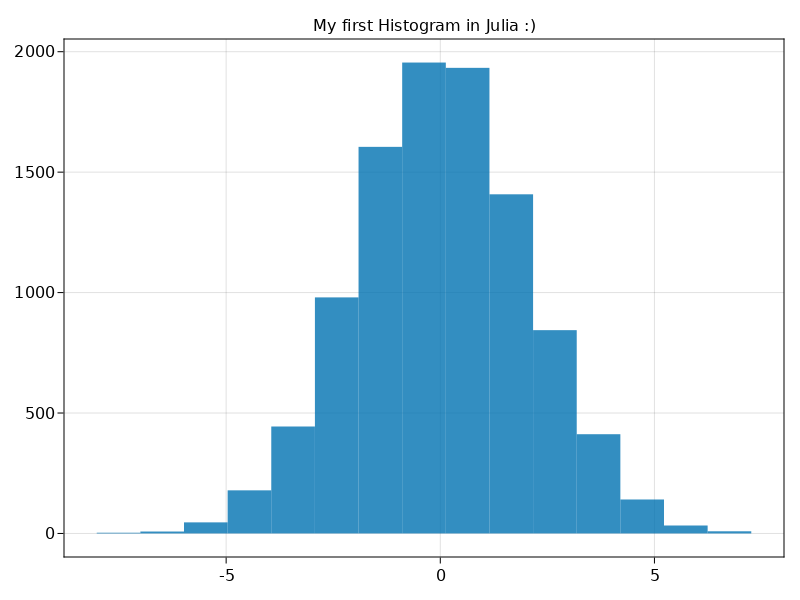

In [29]:
f11 = Figure()
ax11_1 = Axis(f11[1, 1], title = "My first Histogram in Julia :)")
histi11_1 = hist!(ax11_1, dist_data, )
f11

Now we are making the plot look nicer with the tools we have learned so far. 


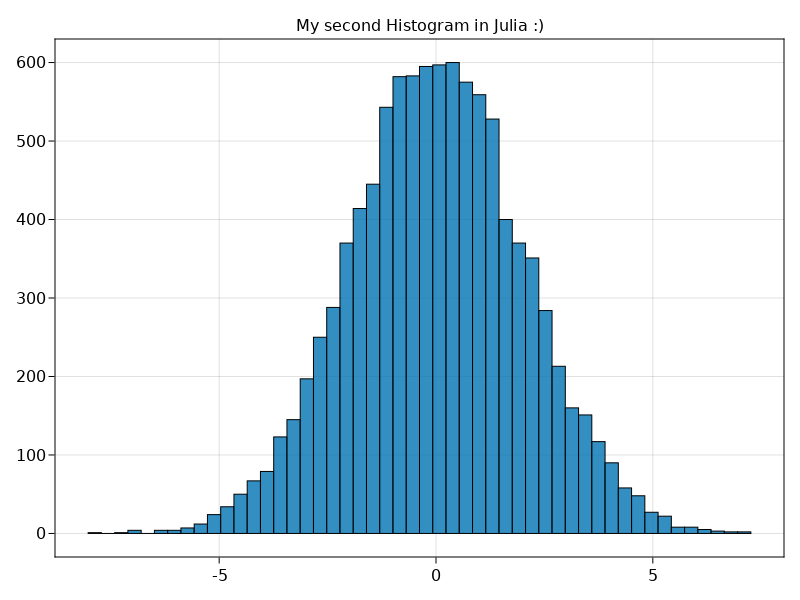

In [30]:
f12 = Figure()
ax12_1 = Axis(f12[1, 1], title = "My second Histogram in Julia :)")
histi12_1 = hist!(ax12_1, dist_data, bins = 50,strokewidth = 1, strokecolor = :black )
f12

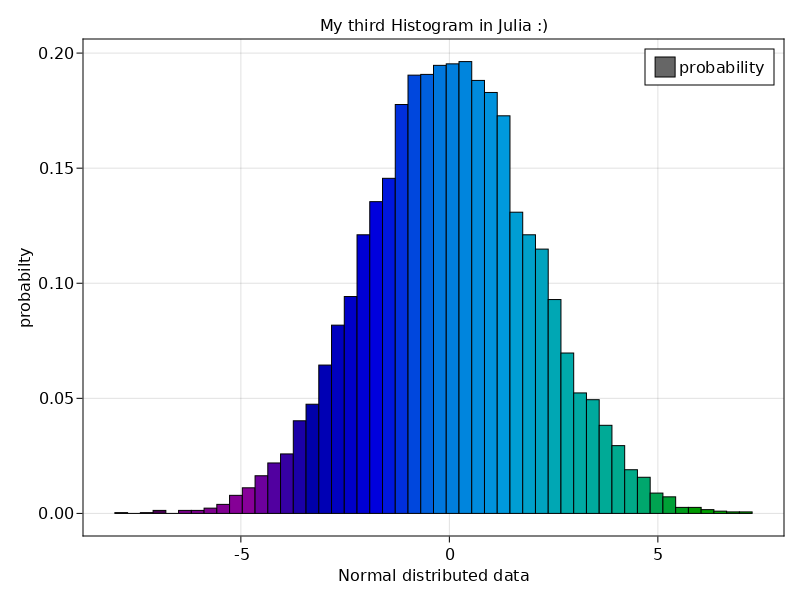

In [31]:
f13 = Figure()
ax13_1 = Axis(f13[1, 1], title = "My third Histogram in Julia :)",xlabel = "Normal distributed data",ylabel = "probabilty")
histi13_1 = hist!(ax13_1, dist_data, bins = 50,strokewidth = 1, strokecolor = :black, normalization = :pdf, color =co.nipy_spectral[1:50], label = "probability" )
axislegend(ax13_1,position = :rt)
f13

### 6. Box-Whisker Plot
Like a histogram a box-whisker plot is a way of graphically show a distribution of values. In `Makie` the function `boxplot!()` leads to a box-whisker plot. The argument the method needs is the input data in form of two arrays one where to position on the x-axis is marked for every datapoint and one for the value of everydatapoint. Optional arguments again can costumize the plot, for example we can make a horizontal box plot with `orientation:horizontal`. https://makie.juliaplots.org/stable/examples/plotting_functions/boxplot/

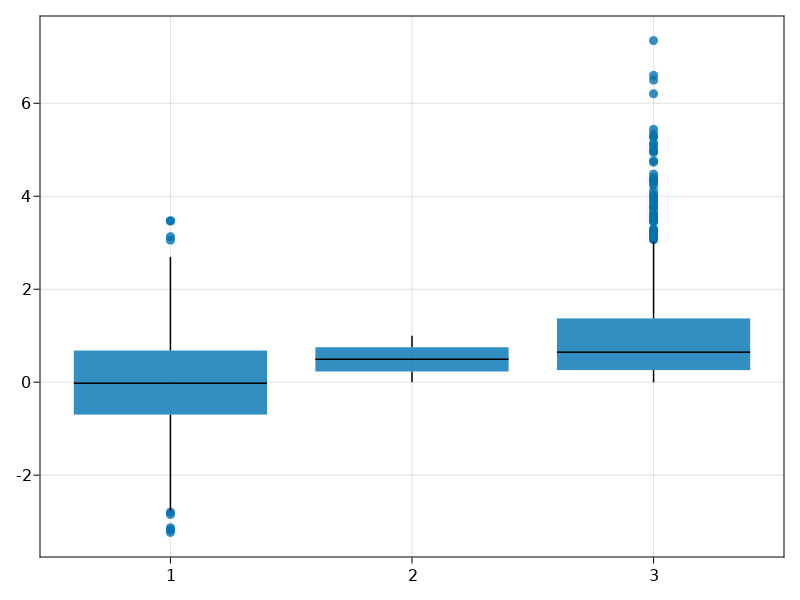

In [32]:
data_points = 1000

y1 = rand(Normal(),data_points)
y2 = rand(Beta(),data_points)
y3 = rand(Erlang() ,data_points)
xs = [1 for i in 1:data_points]


xs = append!(xs,xs.*2,xs.*3)
ys = append!(y1,y2,y3)

boxplot(xs,ys)

## Exercises

#### <p style='color: green'>  Always make pretty plots (title, axis labeling, nice colors, legend, axis limits, grid (where appropriate), ...) !!!</p>

Execute the first cell to get some data you can plot.

In [33]:
# you will learn how this function works in the next chapter import/export
# don't worry for now and just execute this cell 

function Julia_parser(path::String)
    eval(Meta.parse(readline(path)))
end

averagetemp_Station3 = Julia_parser("Temperatur_Station3.json")
averagetemp_Station44 = Julia_parser("Temperatur_Station44.json")
averagetemp_Station73 = Julia_parser("Temperatur_Station73.json")
rainfall_Station3 = Julia_parser("Niederschlag_Station3.json")
rainfall_Station44 = Julia_parser("Niederschlag_Station44.json")
rainfall_Station73 = Julia_parser("Niederschlag_Station73.json")



Histolist = rand(Normal(100,15),100000)
loglist=[exp(-i*0.1) for i in range(1,81)]
Months=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"];


### <p style='color: green'>easy</p>

1. Plot average temperatures per month at the three different stations against the months (Months) in three different plots. 
     - Once as scatter plot with legend, different colors, markers and grid.
     - Once as line plot with legend, different colors, markers and grid.

2. Make a bar plot of the rainfall per month at station 3.

3. Make a boxplot of the temperatures at each station.

4. Make a single boxplot that includes the temperatures of all three stations. Add a dashed, horizontal line at 9.5°C.

5. Make a histogramm of `Histolist`, wich contains generated data of an IQ distribution, with `100` bins. Add a black vertical line at `100`

6. Use the internet to find a keyword argument for `hist()` that plots the probability density instead of absolute occurences, i.e. the area under the all bars combined should be exactly `1`. Use this to make the same histogram with `20` bins.

### <p style='color: red'>hard</p>

7. Make a plot of `loglist`, which could resemble the decline of something over time (just come up with something for your labels), without and with a logarithmic y-axis (use the internet).

8. Make a diagram in wich `averagetemp_Station73` are plotted as a line graph and `rainfall_Station73` is plotted as a bar graph. Try to get the axis for rainfall on the right and for temperature on the left side of the diagram.

9. Make a plot with the rainfall of all three stations in one bar graph where the three different bars are shown for every month.